# Food Sales Prediction Project
<p>
    The information use in this project corresponds to 2013 sales of <strong>1559</strong> products and was collected by data scientist at BigMart across 10 stores in different cities. Some features of each product have been defined. 
    In order to help to the retailer to understand the product properties and the outlets that play a crucial role in the sales, <strong>this project aims to predict the sales of food products in each outlet, it will try to understand the properties of products and outlets which play a key role in increasing sales.</strong>
</p>
<p><a href="https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement" target:"_blank">source: <i>Analytics Vidhya 2013-2022</i></a></p>
<table>
    <tbody>
        <tr>
            <td>Variable</td>
            <td >Description</td>
        </tr>
        <tr>
            <td >Item_Identifier</td>
            <td >Unique product ID</td>
        </tr>
        <tr>
            <td>Item_Weight</td>
            <td >Weight of product</td>
        </tr>
        <tr>
            <td>Item_Fat_Content</td>
            <td>Whether the product is low fat or not</td>
        </tr>
        <tr>
            <td>Item_Visibility</td>
            <td>The % of total display area of all products in a store allocated to the particular product</td>
        </tr>
        <tr>
            <td>Item_Type</td>
            <td>The category to which the product belongs</td>
        </tr>
        <tr>
            <td>Item_MRP</td>
            <td>Maximum Retail Price (list price) of the product</td>
        </tr>
        <tr>
            <td>Outlet_Identifier</td>
            <td>Unique store ID</td>
        </tr>
        <tr>
            <td>Outlet_Establishment_Year</td>
            <td>The year in which store was established</td>
        </tr>
        <tr>
            <td>Outlet_Size</td>
            <td>The size of the store in terms of ground area covered</td>
        </tr>
        <tr>
            <td>Outlet_Location_Type</td>
            <td>The type of city in which the store is located</td>
        </tr>
        <tr>
            <td>Outlet_Type</td>
            <td>Whether the outlet is just a grocery store or some sort of supermarket</td>
        </tr>
    </tbody>
</table>

## Importing Pandas Module

In [1]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("seaborn")

/home/yeison/anaconda3/envs/data-science1/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Charging Information

In [2]:
df = pd.read_csv("sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Characterizing DataFrame

In [3]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observations: 
- There is consistency in the type of data in each column
- <p style="color:rgb(150,0,0);">There are missing data in the columns: Item_Weight - 1463 missing values, and Outlet_Size - 2410 missing values.</p>

## Data Cleaning

Let's check if there is duplicated info

### Remove Duplicate or Irrelevant Observations

In [4]:
df.duplicated().sum()

0

<p style="color:green;">There is not duplicated rows.</p>


### Irrelevant Observations

Since item weight can be categorized as an irrelevant feature in the sales prediction and in this column there is missing information this column will be delete. Another irrelevant columns to this analysis is the year in which store was established, so this column will also be removed.

In [3]:
df.drop(columns = ["Item_Weight", "Outlet_Establishment_Year"], inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [16]:
len(df["Item_Identifier"].unique()) # this will give us the number of products. As was said the numbero of products os 1559a

1559

Missing values in the column "Outlet_size" will be covered in the next section. The rest of the columns do not seem to present categorical inconsistencies. 

### Fixing Structural Errors

#### Type of Information in Each Column

In [17]:
df.dtypes

Item_Identifier          object
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

#### Checking Features
Let's create a function to check the features in the dataset.

In [94]:
num_features = make_column_selector(dtype_include="number")(df) 
_ = df[num_features].apply(lambda x: print("\n",f"max_{x.name}: {x.max()} ----- min_{x.name}: {x.min()}"))


 max_Item_Visibility: 0.328390948 ----- min_Item_Visibility: 0.0

 max_Item_MRP: 266.8884 ----- min_Item_MRP: 31.29

 max_Item_Outlet_Sales: 13086.9648 ----- min_Item_Outlet_Sales: 33.29


**Observations:**
There is consistency in the type of information in each column, and the maximum values in the columns Iten_MRP_max and Item_Outlet_Sales_max make sense. Now let's check categorical columns.

In [95]:
cat_features = make_column_selector(dtype_include="object")(df)
_ = df[cat_features].apply(lambda x: print("\n", f"{x.name}: {x.unique()}"))


 Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

 Item_Fat_Content: ['Low Fat' 'Regular']

 Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

 Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

 Outlet_Size: ['Medium' 'Missing' 'High' 'Small']

 Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

 Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


<div style="background-color:rgb(150,50,50); padding:10px;">
    <p>There are some irregularities in the Item_Fat_Content; it can be deduced that</p>
    <ul>
        <li>LF = Low Fat</li>
        <li>low fat = Low Fat</li>
        <li>reg = Regular</li>
    </ul>
</div>

In [9]:
df["Item_Fat_Content"].replace(["LF","reg","low fat"],["Low Fat", "Regular","Low Fat"], inplace=True)
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Identifying and Handling Missing Data
As mentioned above, there are missing data in the column Outlet_Size. Let's check the missing data in each column.

In [104]:
arr = np.array([13, 6, 3, 5, 10]) 
arr.sort()
arr

array([ 3,  5,  6, 10, 13])

In [15]:
df[df["Outlet_Size"].isna()].shape

(2410, 10)

There are 2410 missing values in the "Outlet Size" columns. Since the outlet size can be considered as an important feature to take into account when doing predictions of sales it is a good idea group the information in order to find patterns that can be useful to make decisions about the missing information.

In [21]:
df.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Identifier"])["Outlet_Size"].unique()

Outlet_Type        Outlet_Location_Type  Outlet_Identifier
Grocery Store      Tier 1                OUT019                [Small]
                   Tier 3                OUT010                  [nan]
Supermarket Type1  Tier 1                OUT046                [Small]
                                         OUT049               [Medium]
                   Tier 2                OUT017                  [nan]
                                         OUT035                [Small]
                                         OUT045                  [nan]
                   Tier 3                OUT013                 [High]
Supermarket Type2  Tier 3                OUT018               [Medium]
Supermarket Type3  Tier 3                OUT027               [Medium]
Name: Outlet_Size, dtype: object

Having seen the structure of the information in the column 'outlet size', it is no possible to determine to which category belong the rows with missing values, so a new category in the outlet size feature will be created and the missing data will be replace by the label "Missing".

<p style="color:green;">Note that yet we modify the whole dataset there is no a data leak since we don't use any estimator </p>

In [10]:
df["Outlet_Size"] = df["Outlet_Size"].fillna("Missing")
df["Outlet_Size"].isna().sum()

0

### Dataset Validation

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(3), object(7)
memory usage: 666.0+ KB


In [8]:
df = df.sort_values(["Outlet_Location_Type","Outlet_Type","Outlet_Identifier","Item_Identifier"])
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2879,DRA24,Regular,0.069909,Soft Drinks,163.2868,OUT019,Small,Tier 1,Grocery Store,491.3604
6179,DRA59,Regular,0.223985,Soft Drinks,186.2924,OUT019,Small,Tier 1,Grocery Store,555.2772
1708,DRC25,Low Fat,0.079440,Soft Drinks,86.7882,OUT019,Small,Tier 1,Grocery Store,85.8882
2950,DRD15,Low Fat,0.099442,Dairy,233.1642,OUT019,Small,Tier 1,Grocery Store,697.0926
2766,DRD25,Low Fat,0.138270,Soft Drinks,111.6860,OUT019,Small,Tier 1,Grocery Store,452.7440


In [17]:
df_indexed = df.set_index(["Outlet_Location_Type","Outlet_Type","Outlet_Identifier","Item_Identifier"])
df_indexed

Item_Fat_Content  \
Outlet_Location_Type Outlet_Type       Outlet_Identifier Item_Identifier                    
Tier 1               Grocery Store     OUT019            DRA24                    Regular   
                                                         DRA59                    Regular   
                                                         DRC25                    Low Fat   
                                                         DRD15                    Low Fat   
                                                         DRD25                    Low Fat   
...                                                                                   ...   
Tier 3               Supermarket Type3 OUT027            NCZ06                    Low Fat   
                                                         NCZ17                    Low Fat   
                                                         NCZ30                    Low Fat   
                                                         NCZ53                    Low Fat   
                                                         NCZ54                    Low Fat   

                                                                          Item_Visibility  \
Outlet_Location_Type Outlet_Type       Outlet_Identifier Item_Identifier                    
Tier 1               Grocery Store     OUT019            DRA24                   0.069909   
                                                         DRA59                   0.223985   
                                                         DRC25                   0.079440   
                                                         DRD15                   0.099442   
                                                         DRD25                   0.138270   
...                                                                                   ...   
Tier 3               Supermarket Type3 OUT027            NCZ06                   0.093706   
                                                         NCZ17                   0.079047   
                                                         NCZ30                   0.026058   
                                                         NCZ53                   0.024359   
                                                         NCZ54                   0.082956   

                                                                                   Item_Type  \
Outlet_Location_Type Outlet_Type       Outlet_Identifier Item_Identifier                       
Tier 1               Grocery Store     OUT019            DRA24                   Soft Drinks   
                                                         DRA59                   Soft Drinks   
                                                         DRC25                   Soft Drinks   
                                                         DRD15                         Dairy   
                                                         DRD25                   Soft Drinks   
...                                                                                      ...   
Tier 3               Supermarket Type3 OUT027            NCZ06                     Household   
                                                         NCZ17            Health and Hygiene   
                                                         NCZ30                     Household   
                                                         NCZ53            Health and Hygiene   
                                                         NCZ54                     Household   

                                                                          Item_MRP  \
Outlet_Location_Type Outlet_Type       Outlet_Identifier Item_Identifier             
Tier 1               Grocery Store     OUT019            DRA24            163.2868   
                                                         DRA59            186.2924   
                                                         DRC

Let's generate a csv file to save the cleaning information

In [117]:
df_indexed.to_csv(path_or_buf="food_sales_forecast_cleaned.csv")

## Data Visualization

### Summary Statistics
Let's start our analysis of the data by examining the dataframe using the method describe.

In [23]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00
mean,0.07,140.99,2181.29
std,0.05,62.28,1706.50
min,0.00,31.29,33.29
25%,0.03,93.83,834.25
50%,0.05,143.01,1794.33
75%,0.09,185.64,3101.30
max,0.33,266.89,13086.96


From this we can observe that:
- The mean in the Sales column is 2181.29, the standard deviation is comparatively large that means that there is a lot of variance in the sales.
- There is a total of 8523 observations.
- The minimum sales is 33.29 dollars.
- The maximum of sales reported was 13089.96 dollars.

## Visualizations

In order to visualize the data, the following graphs were created:
1. Histograms of the columns "Item_Visibility", "Item_MRP" and "Item_Outlet_Sales", this will help to understand the distribution of the prices of the products and the sales.
2. Boxplots of the columns  "Item_MRP" and "Item_Outlet_Sales" this to understand how prices affect sales.
3. Barplot of the columns "Sales" vs "Item_Type" this to identify the products that generate more sales and the products that generate less sales.
4. Pie chart of the columns "Outlet_Type", "Outlet_Location_type" and "Sales", this to identify the percentage of sales in each type of store and the percentage of sales in each type of city.
5. Heatmap of the numerical columns, this to identify the correlation between the numerical columns.

Let's create a histogram and a boxplot to get a clear idea of the distribution of sales.

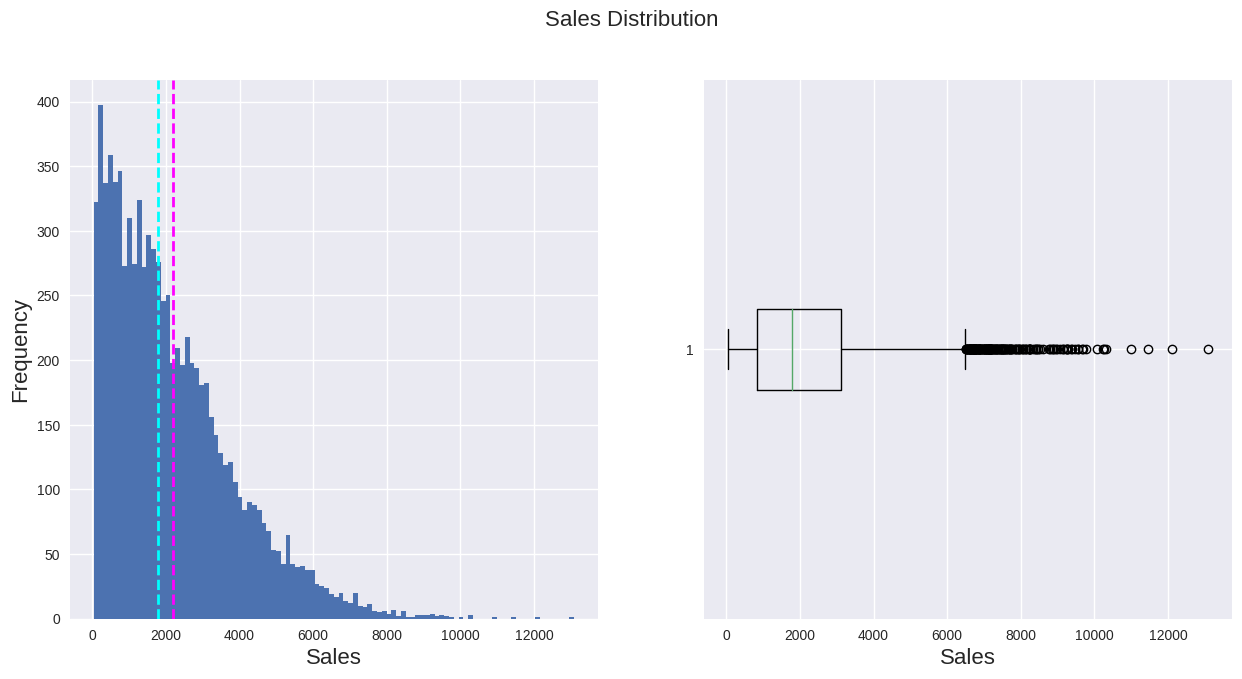

In [118]:
# get the column of interest
label = df['Item_Outlet_Sales']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (15,7), dpi=100)

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency', fontsize=16)

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2) # mean
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2) # median
ax[0].set_xlabel('Sales', fontsize=16)
# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Sales', fontsize=16)

# Add a title to the Figure
fig.suptitle('Sales Distribution', fontsize=16)

# Show the figure
plt.show()

The mean (and median) sales is closer to the low end of that range, with most of the data between 0 and around 6500 dollars. The few values above this are shown in the box plot as small circles, indicating that they are outliers.

### Relationship Between Numeric Features and Distributions.

 Now, let's look for relationships between the features and the sales label we want to be able to predict.

In [47]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

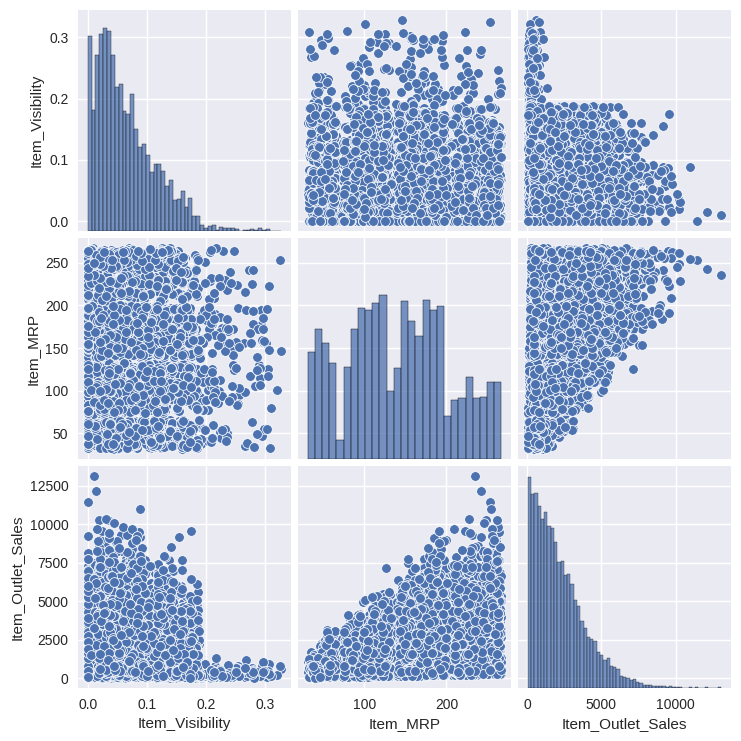

In [49]:
sns.pairplot(df)

Observations:
1. The **distribution** of the studied variables is **not normal**, it is **skewed to the right**.
2. The **majority of the products** have a **price between 100 and 200**.
3. The **majority of the outlets** present **sales under 2500 dollars**.
4. The **visibility** of the products is not normal is **under the 20%** of the total display area of all products in a store.
5. The majority of the products have a visibility between 0 and 10%.
6. There is no a evident correlation between variables.

Let's compare the categorical features to the label:

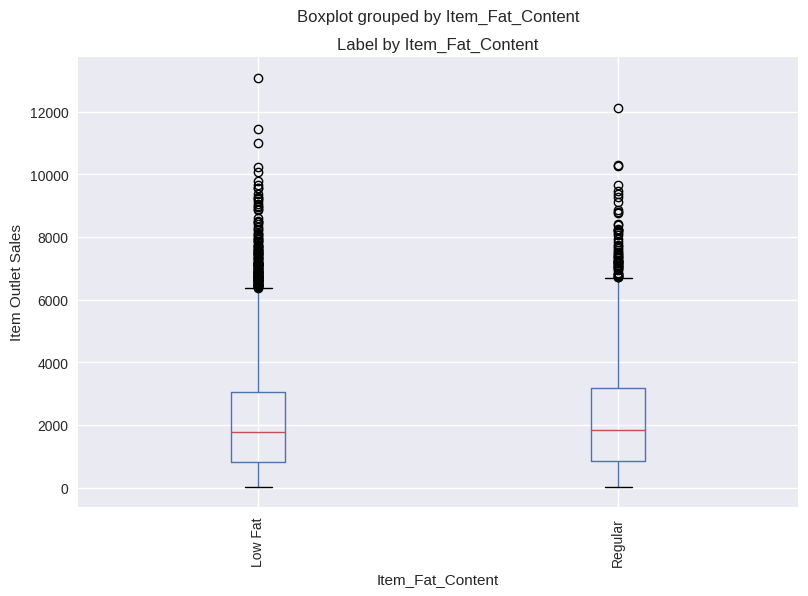

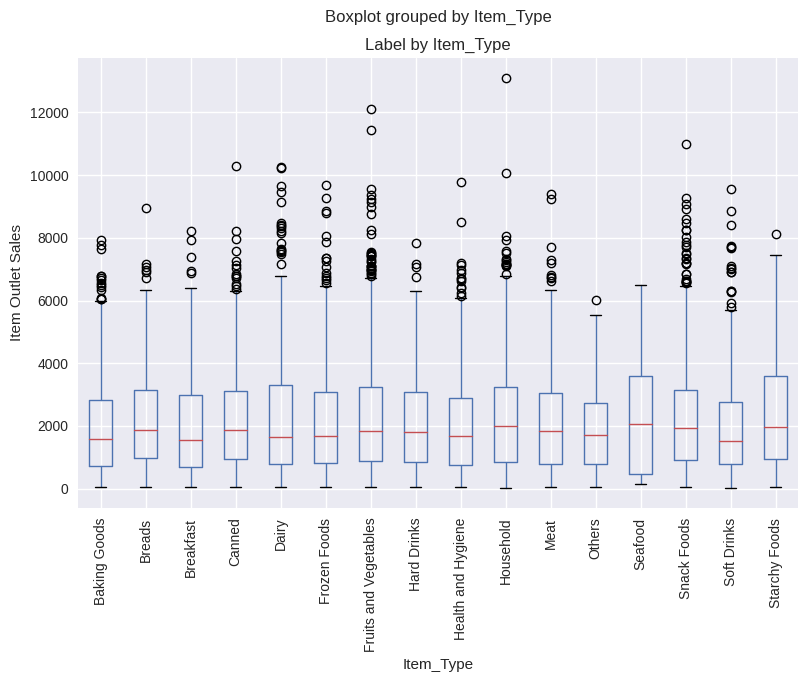

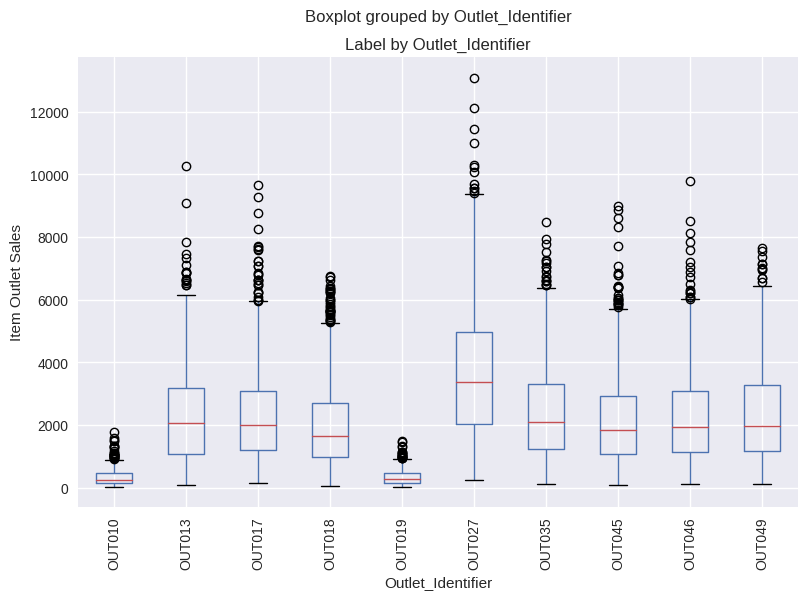

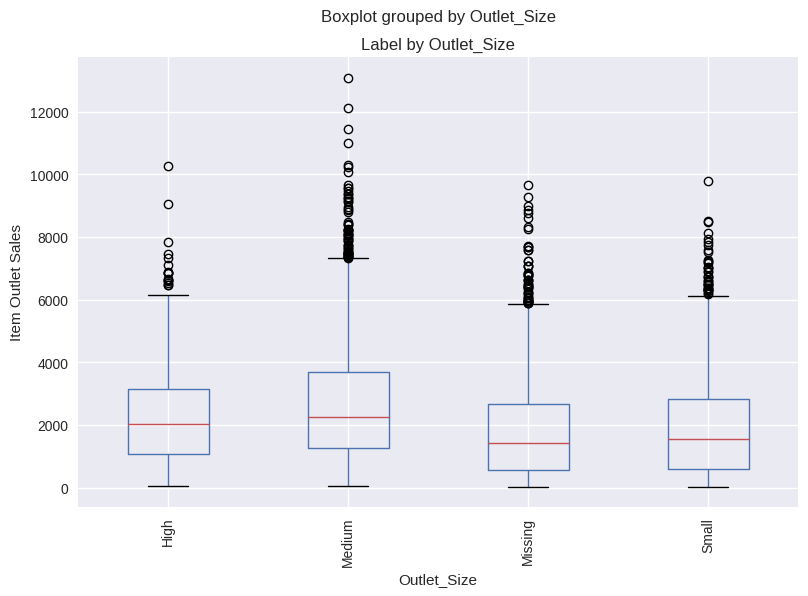

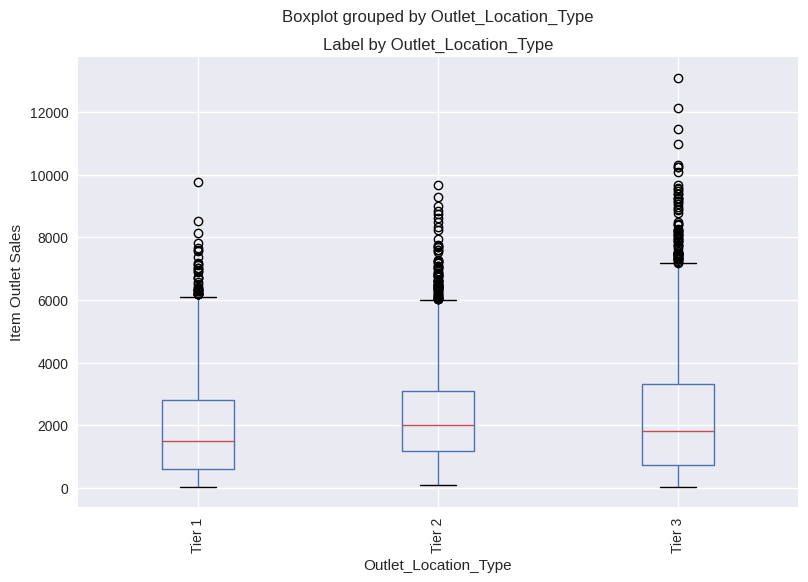

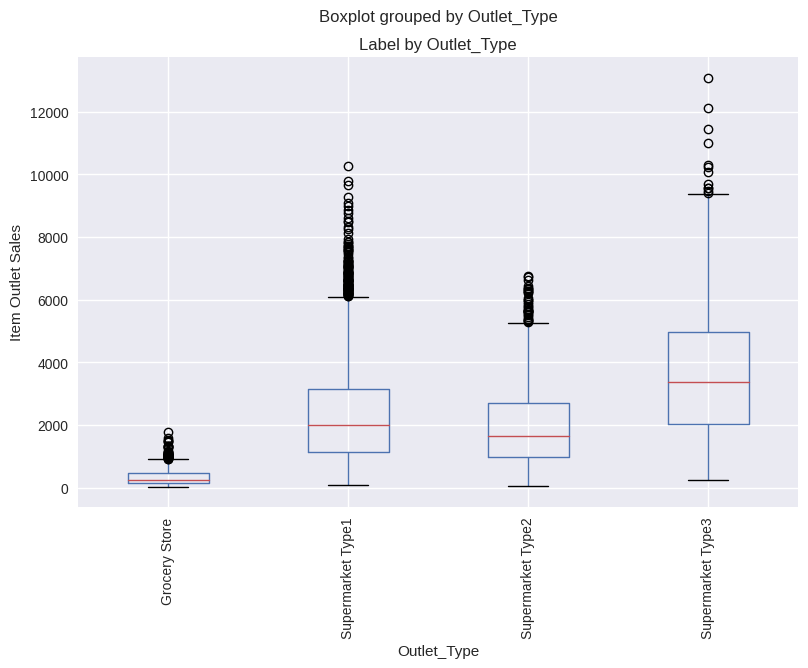

In [37]:
for col in features[1][1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Item_Outlet_Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Item Outlet Sales")
    plt.xticks(rotation=90)
plt.show()

### Bar Charts
Let's plot a bar chart showing the count of each discrete value for each category.

In [32]:
features[1]

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

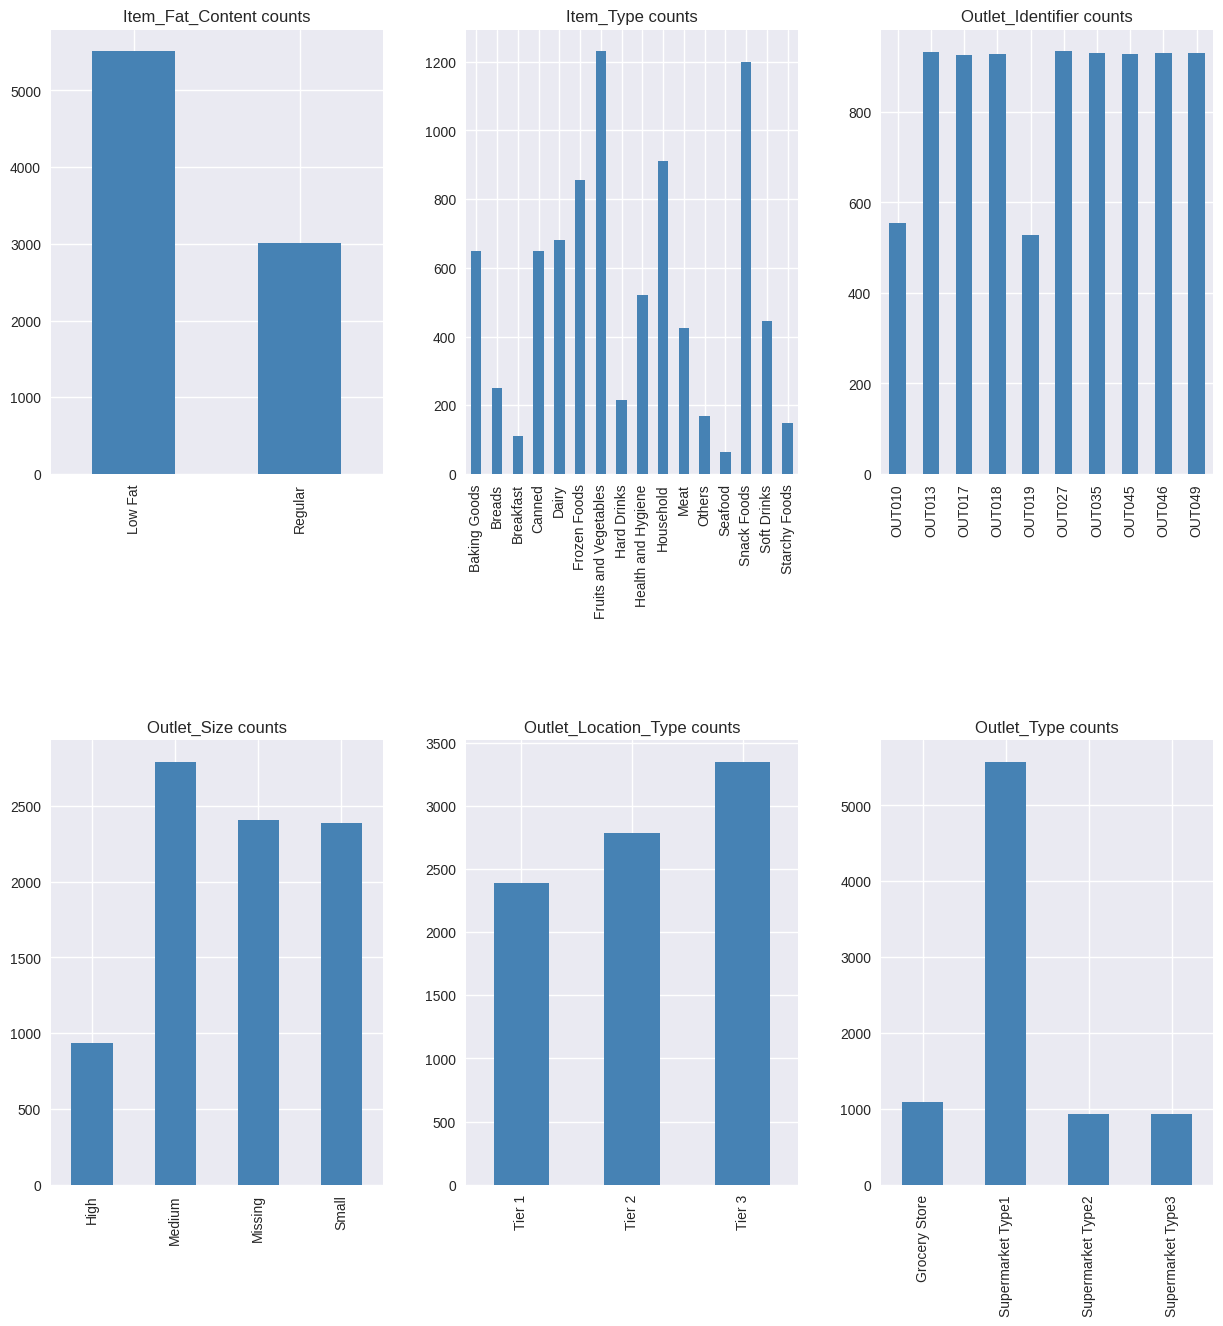

In [46]:
# since in the col Item_Identifier there are a lot of categories (1567) Let's discard it from our list of categorical
# columns
columns = features[1][1:]
fig, axs = plt.subplots(2,3, figsize=(15,15))
plt.subplots_adjust(hspace=0.6, wspace=0.25)
count = 0
for i in range(2):
    for j in range(3):
        #axs[i][j].plot(df[columns[count]].value_counts(),df[columns[count]])
        counts = df[columns[count]].value_counts().sort_index()
        counts.plot.bar(ax = axs[i][j], color='steelblue')
        axs[i][j].button = 20
        axs[i][j].set_title(columns[count] + ' counts')
        count+=1

**The distribution of the data in categorical columns is no uniform:**
- Item_Fat_Content : most of the product have a low content of fat.
- Item_Type : Most of the data belongs to fruit and vegetables, snack food, and household categories.
- Outlet_Identifier: the outlets OUT019 and OUT010 have less quantity of data.
- Outlet_Size: most of the outlets are medium-size.
- Outlet_Location: the tier 3 have more information and the tier 1 have less of information registered in the dataset.
- Outlet_Type: Most of the outlets are supermarkets type1.

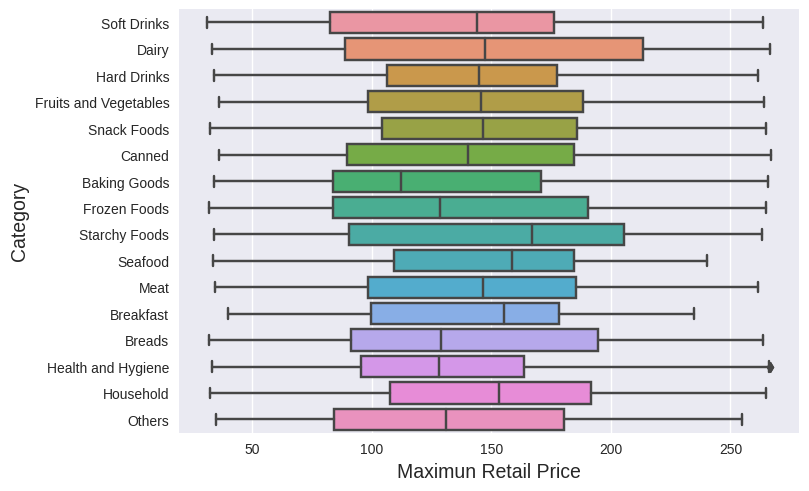

In [12]:
sns.boxplot(x='Item_MRP', y='Item_Type', data=df)
plt.ylabel("Category", fontsize=14)
plt.xlabel("Maximun Retail Price", fontsize=14)
plt.show()

### Bar Chart of Items Type vs Sales
In order to identify the products that generate more sales and the products that generate less sales, the following bar chart was created.

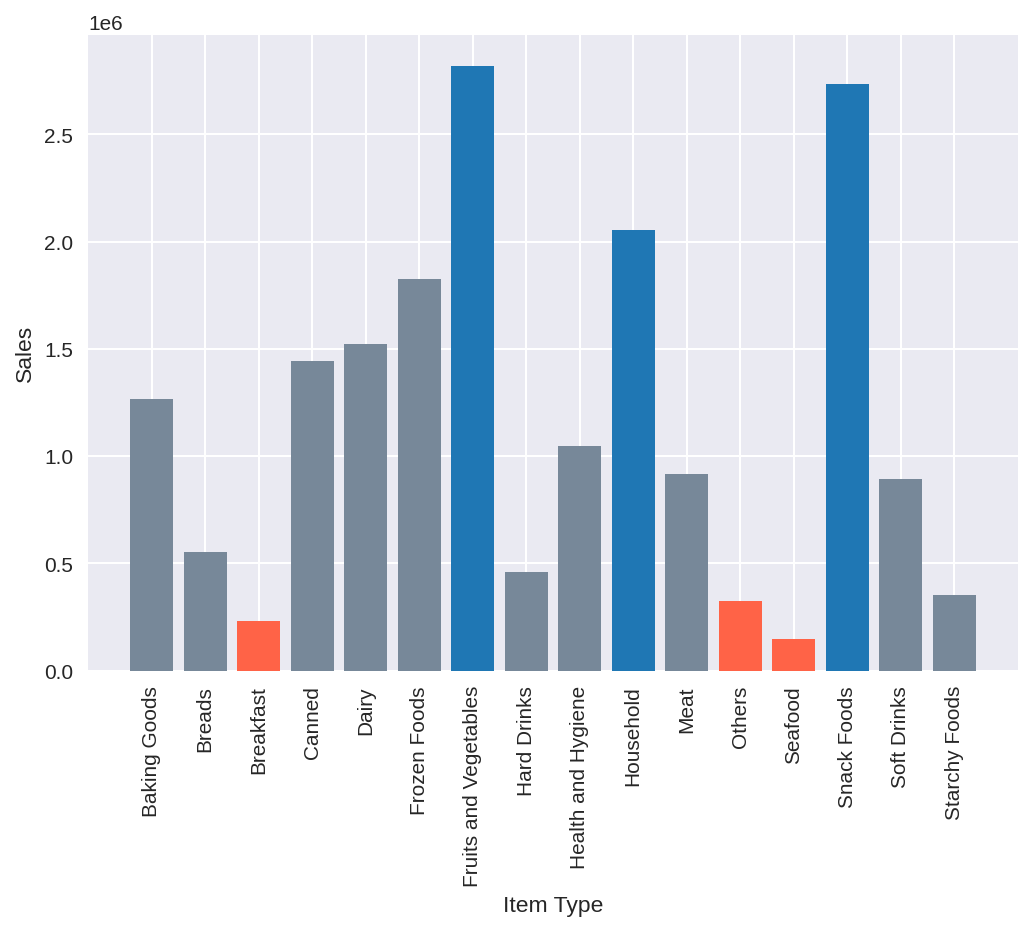

In [36]:
categories = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()  
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1)
bars = ax1.bar(list(categories.index),categories, align='center', linewidth=0, color='lightslategrey')
plt.xlabel("Item Type")
plt.xticks(rotation = 90)
plt.ylabel("Sales")
height_up = bars[5].get_height()
height_down = bars[15].get_height()
for bar in bars:
    height = bar.get_height()
    if height > height_up:
        bar.set_color('#1F77B4')
    elif height < height_down:
        bar.set_color("#ff6347")
#plt.show()

Observations:
1. The categories Fruits and vegetables, Household and Snack Food are the best sellers. On the other hand, the    categories Breakfast, Others and seafood were the least sold.



###  Sales by Location and Outlet Type
In order to identify the **percentage of sales in each type of store and the percentage of sales in each type of city**, the following pie charts were created:
1. Bar chart of the columns "Outlet_Type" vs "Sales", grouped by location, this to identify the percentage of sales in each type of store in each type of city.
2. Pie chart of the columns "Outlet_Type", this to identify the percentage of sales in each type of store.
3. Pie chart of the columns "Outlet_Location_type", this to identify the percentage of sales in each type of city.

<h4 id="sales_by_outlet_type_and_location"> Bar Chart of Outlet Type vs Sales, Grouped by Location </h4>

In [38]:
sales_by_location_and_outlet_type =df.groupby(["Outlet_Location_Type", "Outlet_Type"])["Item_Outlet_Sales"].sum()
sales_by_location_and_outlet_type

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store        1.796941e+05
                      Supermarket Type1    4.302365e+06
Tier 2                Supermarket Type1    6.472314e+06
Tier 3                Grocery Store        1.883402e+05
                      Supermarket Type1    2.142664e+06
                      Supermarket Type2    1.851823e+06
                      Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

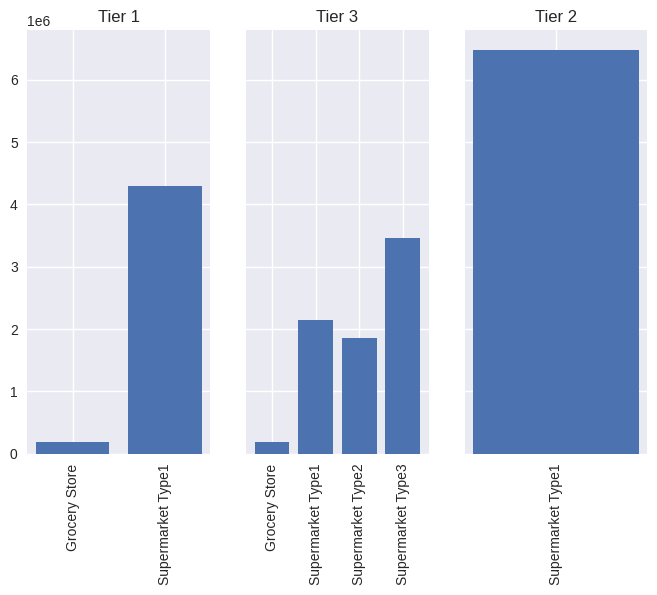

In [39]:
locations = np.array(df["Outlet_Location_Type"].unique()) 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True) # create 1x3 grid of axis subplots with shared y axis
axes = [ax1 ,ax2, ax3]
for n in range(len(axes)):
    values = sales_by_location_and_outlet_type[locations[n]] # get the values (sales) for each location
    axes[n].bar(list(values.index), values) # plot the values for each location
    axes[n].tick_params( axis= "x", labelrotation=90) # rotate the x axis labels
    axes[n].set_title(locations[n]) # set the title of each subplot

Observations:
1. The location type **Tier 3 has highest percentage of sales**.
2. The outlet type **Supermarket Type 1 has the highest sales**.
3. The outlet type **Supermarket Type 3 has the highest sales in Tier 3**.
4. The outlet type **Grocery Store has the lowest sales**.
5. The outlet type **Supermarket Type 1 has the highest sales in Tier 1 and Tier 2**. (representing the highest percentage of the total sales categorized by outlet type).


<h4 id="pie_chart_sales_location_outlet_type"> Pie Charts of Percentage of Sales by Outlet Type and Outlet Location Type </h4>

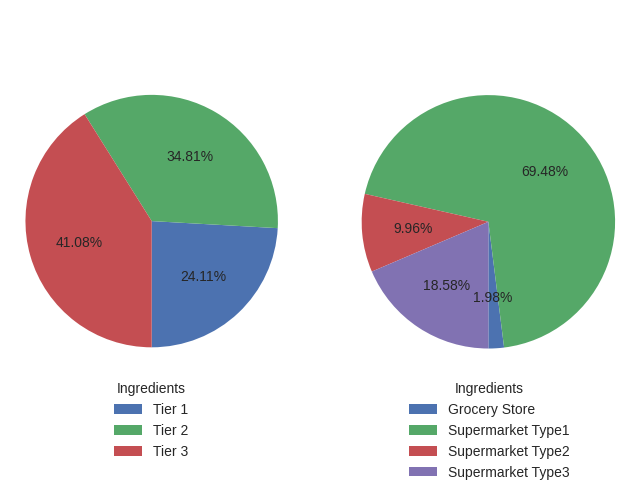

In [40]:
etiquetas = list(df['Item_Type'].unique())

fig2 = plt.figure(dpi=100)

ax1 = fig2.add_subplot(1,2,1) 
locations = df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum()

ax2 = fig2.add_subplot(1,2,2)
outlet_type = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()

ax1.pie(locations, autopct='%.2f%%', startangle=-90)
ax1.legend(np.array(locations.index),
          title="Ingredients",
          loc="upper center",
          bbox_to_anchor=(0.25, -0.85, 0.5, 1))

ax2.pie(outlet_type, autopct='%.2f%%', startangle=-90)
ax2.legend(np.array(outlet_type.index),
          title="Ingredients",
          loc="upper center",
          bbox_to_anchor=(0.25, -0.85, 0.5, 1))

ax1.axis("equal") 
ax2.axis("equal") 

plt.show()

Observations:
1. The type of store that generates the most sales is the Supermarket Type 1.
2. The type of store that generates the least sales is the Grocery Store.
3. The type of city that generates the most sales is Tier 3.
4. The type of city that generates the least sales is Tier 2.

In [60]:
data = df.groupby(["Outlet_Identifier", "Item_Identifier"]).agg({"Item_Visibility": "mean","Item_MRP":"mean","Item_Outlet_Sales":"sum"})

In [61]:
data.corr()

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.128625
Item_MRP,-0.001315,1.000000,0.567574
Item_Outlet_Sales,-0.128625,0.567574,1.000000


In [50]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Splitting the Dataset 

In [21]:
X = df.drop(columns=["Item_Outlet_Sales", "Item_Identifier"])
y = df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
print(f"Numerical columns: {features[0]} \nCategorical columns: {features[1]}")
#print(f"Nominal features: {features[0]} \nCategorical features: {features[1]}")

Numerical columns: ['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'] 
Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In this case we can observe that the all the **ordinal features** are as follow:
- Item_Fat_content
- Outlet_Size

The **nominal features** are the following:
- Item_Identifier --> This column will be deleted because it has more that 1000 categories and it is possible to do the analysis without the column.
- Item_Type
- Outlet_Identifier
- Outlet_Location_Type
- Outlet_Type

## Instantiate Transformers

In [12]:
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

## Instantiate Pipelines

In [13]:
num_pipe = make_pipeline(scaler)
ord_cat_pipe = make_pipeline(ordinal_encoder)
nom_cat_pipe = make_pipeline(ohe)

In [26]:
num_tuple = (num_pipe, ['Item_Visibility', 'Item_MRP'])
ord_tuple = (ord_cat_pipe, ["Item_Fat_Content", "Outlet_Size"])
nom_tuple = (nom_cat_pipe, ["Item_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type"])

## Instantiate ColumnTransformer

In [27]:
preprocessor = make_column_transformer(num_tuple, ord_tuple, nom_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Visibility', 'Item_MRP']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [28]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Visibility', 'Item_MRP']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [29]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [30]:
X_train_processed

array([[ 1.12875865, -0.82852101,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.09726794,  1.14455284,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.17848722,  0.73897853,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.6959806 ,  0.5331508 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28917327, -1.02302766,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.58015007, -0.61318628,  0.        , ...,  0.        ,
         1.        ,  0.        ]])